In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats as st

# pd.read_csv("../")
db = pd.read_csv("dataset/framingham.csv")

In [2]:
db.head()
print("Rows: ", db.shape[0])
print("Columns: ", db.shape[1])
missing_percentage = (db.isnull().sum() / db.shape[0]) * 100
print(missing_percentage)

Rows:  11627
Columns:  39
RANDID       0.000000
SEX          0.000000
TOTCHOL      3.517674
AGE          0.000000
SYSBP        0.000000
DIABP        0.000000
CURSMOKE     0.000000
CIGPDAY      0.679453
BMI          0.447235
DIABETES     0.000000
BPMEDS       5.100198
HEARTRTE     0.051604
GLUCOSE     12.384966
educ         2.537198
PREVCHD      0.000000
PREVAP       0.000000
PREVMI       0.000000
PREVSTRK     0.000000
PREVHYP      0.000000
TIME         0.000000
PERIOD       0.000000
HDLC        73.965769
LDLC        73.974370
DEATH        0.000000
ANGINA       0.000000
HOSPMI       0.000000
MI_FCHD      0.000000
ANYCHD       0.000000
STROKE       0.000000
CVD          0.000000
HYPERTEN     0.000000
TIMEAP       0.000000
TIMEMI       0.000000
TIMEMIFC     0.000000
TIMECHD      0.000000
TIMESTRK     0.000000
TIMECVD      0.000000
TIMEDTH      0.000000
TIMEHYP      0.000000
dtype: float64


In [3]:
# if 'RANDID' in db.columns:
#     db.drop(columns=['RANDID'], inplace=True)
# if 'educ' in db.columns:
#     db.drop(columns=['educ'], inplace=True)
# if 'HDLC' in db.columns:
#     db.drop(columns=['HDLC'], inplace=True)
# if 'LDLC' in db.columns:
#     db.drop(columns=['LDLC'], inplace=True)

In [4]:
# # 1. TOTCHOL (Total Cholesterol)
# # Null values replace by mean of the column
# db['TOTCHOL'].fillna(db['TOTCHOL'].mean(), inplace=True)

# # 2. CIGPDAY (Cigarettes per Day)
# # Impute missing values in 'cigsPerDay' based on 'currentSmoker' as Median of respective categories
# median_cigsPerDay_smoker = db[db['CURSMOKE'] == 1]['CIGPDAY'].median()
# median_cigsPerDay_non_smoker = db[db['CURSMOKE'] == 0]['CIGPDAY'].median()

# db.loc[(db['CURSMOKE'] == 1) & (db['CIGPDAY'].isna()), 'CIGPDAY'] = median_cigsPerDay_smoker
# db.loc[(db['CURSMOKE'] == 0) & (db['CIGPDAY'].isna()), 'CIGPDAY'] = median_cigsPerDay_non_smoker


# # 3. BMI (Body Mass Index)
# # Impute missing values in 'BMI' based on 'Gender' and 'Age' as Median of respective categories
# median_bmi_male = db[(db['SEX'] == 2) & (db['BMI'].notna())]['BMI'].median()
# median_bmi_female = db[(db['SEX'] == 1) & (db['BMI'].notna())]['BMI'].median()

# db.loc[(db['SEX'] == 2) & (db['BMI'].isna()), 'BMI'] = median_bmi_male
# db.loc[(db['SEX'] == 1) & (db['BMI'].isna()), 'BMI'] = median_bmi_female

# # 4. BPMEDS (Blood Pressure Medication)
# # Split dataset into two parts: one with missing 'BPMEDS' values (to predict) and one without (to train the model)
# train_data = db[~db['BPMEDS'].isna()]
# predict_data = db[db['BPMEDS'].isna()]

# # Select the features (SYSBP and DIABP) for training
# X_train = train_data[['SYSBP', 'DIABP']]

# # Target variable for training is 'BPMEDS'
# y_train = train_data['BPMEDS']

# # Select the features (SYSBP and DIABP) for prediction
# X_predict = predict_data[['SYSBP', 'DIABP']]

# # Train a Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train, y_train)

# # Predict 'BPMEDS' values for the missing data
# predicted_bpmeds = rf_classifier.predict(X_predict)

# # Assign the predicted 'BPMEDS' values back to the original dataset
# db.loc[db['BPMEDS'].isna(), 'BPMEDS'] = predicted_bpmeds

# # 5. HEARTRTE (Heart Rate)
# db['HEARTRTE'].fillna(db['HEARTRTE'].mean(), inplace=True)

# # 6. GLUCOSE (Glucose Level)

# # Calculate the median 'GLUCOSE' for individuals with diabetes ('DIABETES' = 1)
# median_glucose_diabetes = db[db['DIABETES'] == 1]['GLUCOSE'].median()
# # Calculate the median 'GLUCOSE' for individuals without diabetes ('DIABETES' = 0)
# median_glucose_no_diabetes = db[db['DIABETES'] == 0]['GLUCOSE'].median()

# # Impute missing 'GLUCOSE' values for individuals with diabetes
# db.loc[(db['DIABETES'] == 1) & (db['GLUCOSE'].isna()), 'GLUCOSE'] = median_glucose_diabetes
# # Impute missing 'GLUCOSE' values for individuals without diabetes
# db.loc[(db['DIABETES'] == 0) & (db['GLUCOSE'].isna()), 'GLUCOSE'] = median_glucose_no_diabetes


In [5]:
raw_cat = db[['SEX', 'CURSMOKE', 'DIABETES', 'BPMEDS',
                'educ', 'PREVCHD', 'PREVAP', 'PREVMI',
                'PREVSTRK', 'PREVHYP']]
raw_num = db[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP',
                'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']]

raw_cat_1 = pd.get_dummies(raw_cat)
raw_num_1 = raw_num
cov = pd.concat([raw_cat_1,raw_num_1],axis=1)

## educ null replaced by 0
cov.educ.fillna(0,inplace=True)

## CIGPDAY null replaced by median (only for CURSMOKE==1)
cov.CIGPDAY.fillna(cov.CIGPDAY.where(cov.CURSMOKE==1).median(),inplace=True)

## TOTCHOL, BMI null replaced by median
cov.TOTCHOL.fillna(cov.TOTCHOL.median(),inplace=True)
cov.BMI.fillna(cov.BMI.median(),inplace=True)

## BPMEDS null replaced by 0 (no medication)
cov.BPMEDS.fillna(0,inplace=True)

## GLUCOSE null replaced by median
cov.GLUCOSE.fillna(cov.GLUCOSE.median(),inplace=True)

## HEARTRTE null replaced by median
cov.HEARTRTE.fillna(cov.HEARTRTE.median(),inplace=True)

## Check
(cov.isnull().sum()/cov.shape[0])*100

SEX         0.0
CURSMOKE    0.0
DIABETES    0.0
BPMEDS      0.0
educ        0.0
PREVCHD     0.0
PREVAP      0.0
PREVMI      0.0
PREVSTRK    0.0
PREVHYP     0.0
TOTCHOL     0.0
AGE         0.0
SYSBP       0.0
DIABP       0.0
CIGPDAY     0.0
BMI         0.0
HEARTRTE    0.0
GLUCOSE     0.0
dtype: float64

In [6]:
cov_1 = pd.DataFrame(StandardScaler().fit_transform(cov),columns=cov.columns)
time = pd.DataFrame((db['TIMECVD'] - db['TIME']).values,columns=["DIFCVD"])
event = (db['CVD'])

data = pd.concat([cov_1,time,event],axis=1)

In [7]:
data.columns

Index(['SEX', 'CURSMOKE', 'DIABETES', 'BPMEDS', 'educ', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP',
       'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE', 'DIFCVD', 'CVD'],
      dtype='object')

In [8]:
# Verify no null values in the dataframe
db.isnull().sum()

RANDID         0
SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
educ         295
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        8600
LDLC        8601
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64

In [9]:
# data = db.drop(labels=['TIMEAP','TIMEMI','TIMEMIFC','TIMECHD',
#                      'TIMESTRK','TIMEDTH','TIMEHYP','DEATH',
#                      'MI_FCHD','ANYCHD','STROKE','HYPERTEN',
#                      'HOSPMI','ANGINA','PERIOD','CVD','TIMECVD',
#                      'TIME','PREVSTRK'],axis=1)
# time = pd.DataFrame((db['TIMECVD'] - db['TIME']).values,columns=['DIFCVD'])
# event = db['CVD']

In [10]:
cat = ['CURSMOKE','PREVCHD','PREVAP','PREVMI','PREVSTRK','PREVHYP','DIABETES']
# data_cat = data[cat]
# data_num = data.drop(labels=cat,axis=1)

In [11]:
# data_num_st = pd.DataFrame(StandardScaler().fit_transform(data_num),columns=data_num.columns)
# data_cat_dum = pd.get_dummies(data_cat)

# data = pd.concat([data_num_st,data_cat_dum,event,time],axis=1)

In [12]:
targets = ['CVD','DIFCVD']
cvd = 'CVD'
labels = event.unique()

test_stats = {}
p_vals = {}

alpha = 0.01

In [13]:
for col in data.columns:
    if(data[col].unique().shape[0]==1):
        continue

    if (col not in targets):
        if col in cat:
            observed = pd.crosstab(index = data[col], columns = data[cvd])
            test_stat, p_value, _, _ = st.chi2_contingency(observed)
        else:
            counts = [data[data[cvd] == label][col] for label in labels]
            test_stat, p_value = st.ttest_ind(counts[0],counts[1])

        test_stats[col] = test_stat
        p_vals[col] = p_value

In [14]:
results = pd.DataFrame({'Feature' : list(p_vals.keys()),
                        'CV' : list(test_stats.values()),
                        'p value' : list(p_vals.values()),
                        'Significant' : ['S' if p_val < alpha else 'X' for p_val in p_vals.values()]
                        })

In [15]:
results

,Feature,CV,p value,Significant
0,SEX,-19.200706,6.491779e-81,S
1,CURSMOKE,5.998063,1.432159e-02,X
2,DIABETES,281.847565,2.971559e-63,S
3,BPMEDS,11.972759,7.697966e-33,S
4,educ,-7.371812,1.797415e-13,S
5,PREVCHD,964.871203,7.764919e-212,S
6,PREVAP,473.028726,7.025873e-105,S
7,PREVMI,1054.224889,2.937897e-231,S
8,PREVSTRK,459.632264,5.779856e-102,S
9,PREVHYP,496.558158,5.331517e-110,S


In [16]:
data.columns

Index(['SEX', 'CURSMOKE', 'DIABETES', 'BPMEDS', 'educ', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP',
       'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE', 'DIFCVD', 'CVD'],
      dtype='object')

In [17]:
data = data[results[results['Significant']=='S']['Feature'].to_list()+targets]

In [18]:
data.columns

Index(['SEX', 'DIABETES', 'BPMEDS', 'educ', 'PREVCHD', 'PREVAP', 'PREVMI',
       'PREVSTRK', 'PREVHYP', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY',
       'BMI', 'GLUCOSE', 'CVD', 'DIFCVD'],
      dtype='object')

In [19]:
data.describe()

,SEX,DIABETES,BPMEDS,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TOTCHOL,AGE,SYSBP,DIABP,CIGPDAY,BMI,GLUCOSE,CVD,DIFCVD
count,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,11627.000000,11627.000000
mean,1.637787e-16,6.355590e-17,-7.577819e-17,8.555602e-17,-3.300018e-17,1.772232e-17,-5.255584e-17,-1.711120e-17,1.222229e-17,-8.188933e-17,1.338341e-16,-4.436691e-16,5.328918e-16,5.339612e-17,8.225600e-16,1.295563e-16,0.249333,5209.063559
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.432646,2903.149899
min,-1.146827e+00,-2.185421e-01,-2.972620e-01,-1.827354e+00,-2.794126e-01,-2.387467e-01,-1.823063e-01,-1.150921e-01,-9.222522e-01,-3.008008e+00,-2.383216e+00,-2.317087e+00,-4.548832e+00,-6.837440e-01,-2.796128e+00,-1.903881e+00,0.000000,-4638.000000
25%,-1.146827e+00,-2.185421e-01,-2.972620e-01,-8.852777e-01,-2.794126e-01,-2.387467e-01,-1.823063e-01,-1.150921e-01,-9.222522e-01,-6.743260e-01,-7.102561e-01,-7.160440e-01,-6.893656e-01,-6.837440e-01,-6.780661e-01,-4.529475e-01,0.000000,3971.500000
50%,8.719708e-01,-2.185421e-01,-2.972620e-01,5.679843e-02,-2.794126e-01,-2.387467e-01,-1.823063e-01,-1.150921e-01,-9.222522e-01,-6.846607e-02,-8.289619e-02,-1.896738e-01,-8.900418e-02,-6.837440e-01,-9.663726e-02,-1.542258e-01,0.000000,5495.000000
75%,8.719708e-01,-2.185421e-01,-2.972620e-01,9.988745e-01,-2.794126e-01,-2.387467e-01,-1.823063e-01,-1.150921e-01,1.084302e+00,5.822723e-01,7.535837e-01,5.560173e-01,5.971232e-01,9.578629e-01,5.299866e-01,1.444959e-01,0.000000,6917.000000
max,8.719708e-01,4.575777e+00,3.364036e+00,1.940951e+00,3.578937e+00,4.188539e+00,5.485274e+00,8.688695e+00,1.084302e+00,1.020871e+01,2.740223e+00,6.960188e+00,5.743078e+00,6.703487e+00,7.554770e+00,1.683024e+01,1.000000,8766.000000


## CoxPH

In [20]:
def _ctd_score(surv, times, labs):
    d = 0
    n = 0
    ai = 0
    # surv = surv[:, gt.squeeze(), :]
    # print(surv.shape,times.shape,labs.shape)

    surv = surv[np.reshape(labs, (-1)) == 1, :]
    times = times[np.reshape(labs, (-1)) == 1, :]
    labs = labs[np.reshape(labs, (-1)) == 1]

    # print(surv.shape,times.shape,labs.shape)

    for i in range(times.shape[0]):
        ai = (times > times[i]) * 1
        n += np.sum(ai * (surv[i, np.where(times==times[i])[0]] < surv[:, np.where(times==times[i])[0]]))
        d += np.sum(ai)
        
    # print(ai)
    return n / d
    # # print(np.argmax(surv, axis=1).shape,times.shape)
    # return np.sum((np.argmax(surv, axis=1).reshape(-1, 1)-times)**2), len(times)

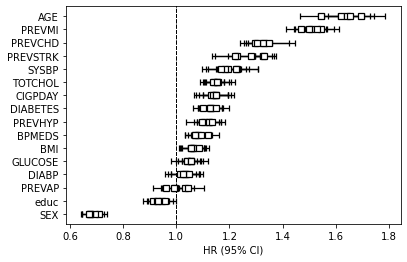

In [24]:
from lifelines.fitters.coxph_fitter import CoxPHFitter
from sklearn.model_selection import StratifiedKFold

cph = CoxPHFitter(alpha=0.05)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

## CCDFs corresponding to each split
ccdfs = []

## ctd-indices and c-indices corresponding to each split
ctd_indices = []
c_indices = []

## 5-fold splitting
for train_ind, test_ind in skf.split(data,event):
    combined_df_train, combined_df_test = data.iloc[train_ind], data.iloc[test_ind]
    event_train, event_test = event.iloc[train_ind], event.iloc[test_ind]
    time_train, time_test = time.iloc[train_ind], time.iloc[test_ind]

    ## Fit the model to the train set
    cph.fit(combined_df_train,duration_col='DIFCVD',event_col='CVD',fit_options={'step_size':0.1})

    ## Predict CCDF (survival probability) from Cox PH model
    ccdf = cph.predict_survival_function(combined_df_test).reset_index()
    ccdf.rename(columns={'index':'TIME'},inplace=True)
    ccdfs.append(ccdf)

    ## Change arrays for ctd-index
    ccdf = np.array(ccdf.T)[1:]
    time_test = np.array(time_test)
    event_test = np.array(event_test)

    ctd_index = _ctd_score(ccdf,time_test,event_test)
    ctd_indices.append(ctd_index)
    c_indices.append(cph.concordance_index_)

    # cph.print_summary()
    cph.plot(hazard_ratios=1)

In [25]:
print(ctd_indices)
print(c_indices)

[2.049814210648742, 4.325023476144051, 4.721945905828979, 2.521776239219314, 3.49370922087891]
[0.8127172643227292, 0.8044501255766708, 0.8040785297473778, 0.8119874860969687, 0.8059542432869384]


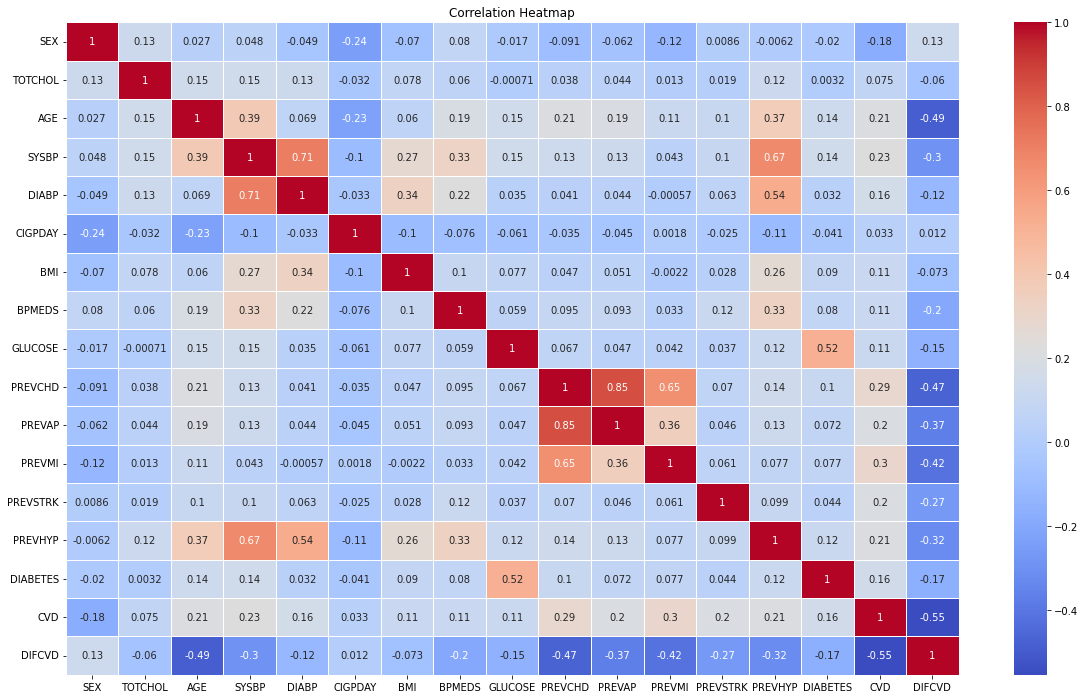

In [97]:
# Create a heatmap of the dataset
plt.figure(figsize=(20, 12))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

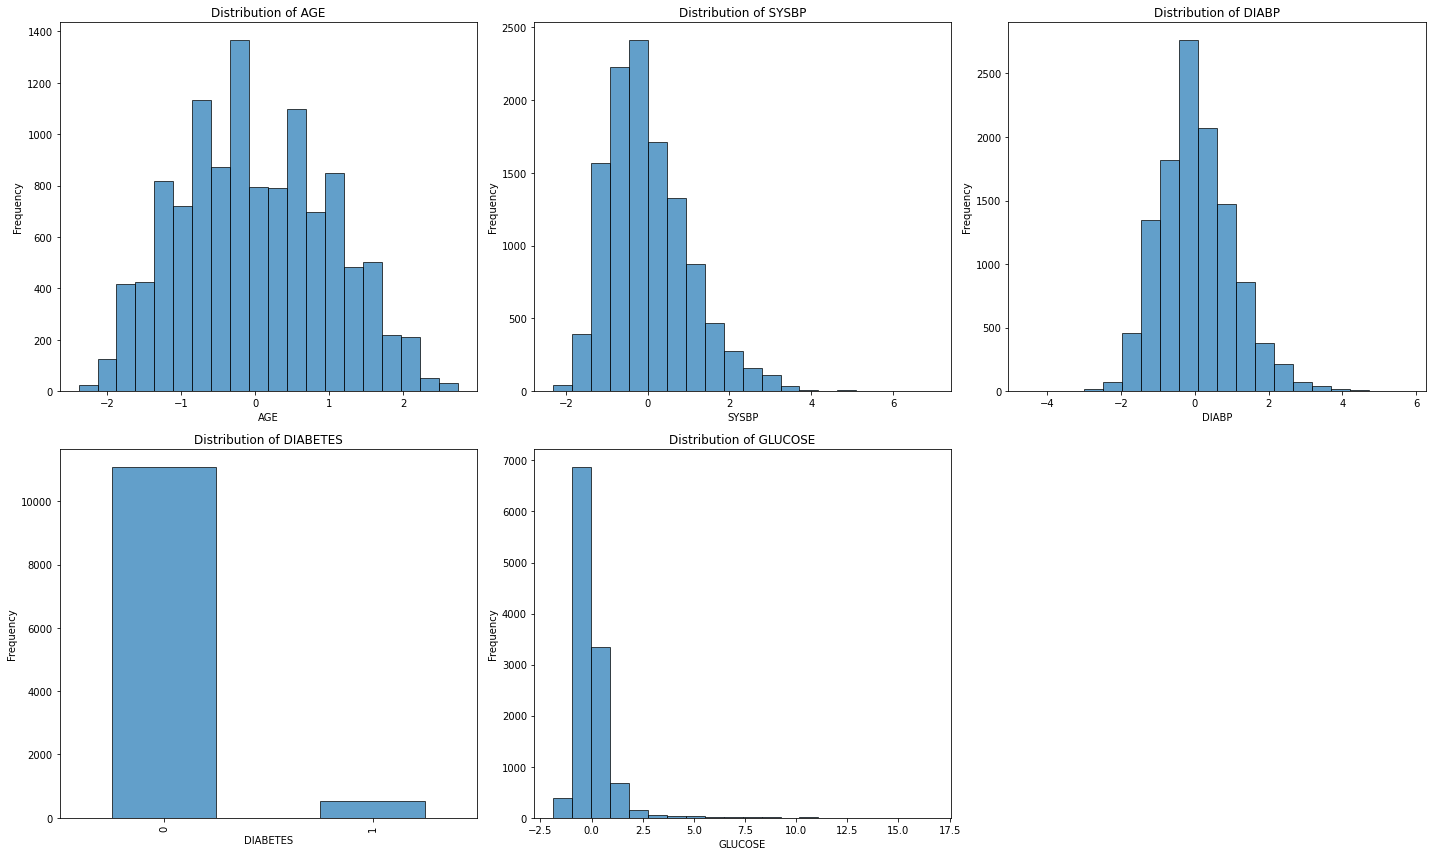

In [86]:
# Create subplots to display histograms
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Histogram for 'AGE'
axes[0, 0].hist(data['AGE'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('AGE')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of AGE')

# 'SYSBP'
axes[0, 1].hist(data['SYSBP'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('SYSBP')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of SYSBP')

# 'DIABP'
axes[0, 2].hist(data['DIABP'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('DIABP')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of DIABP')

# Bar chart for 'DIABETES'
data['DIABETES'].value_counts().plot(kind='bar', ax=axes[1, 0], edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('DIABETES')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of DIABETES')

# 'GLUCOSE'
axes[1, 1].hist(data['GLUCOSE'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('GLUCOSE')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of GLUCOSE')

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


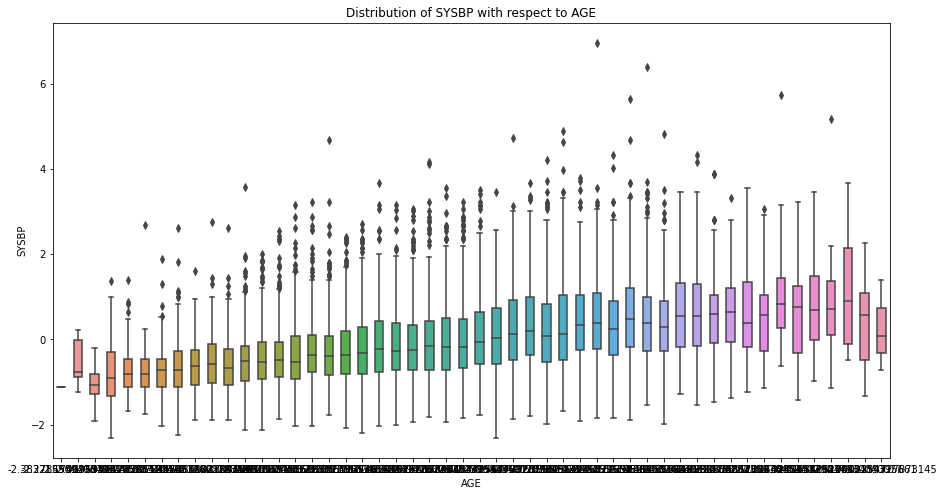

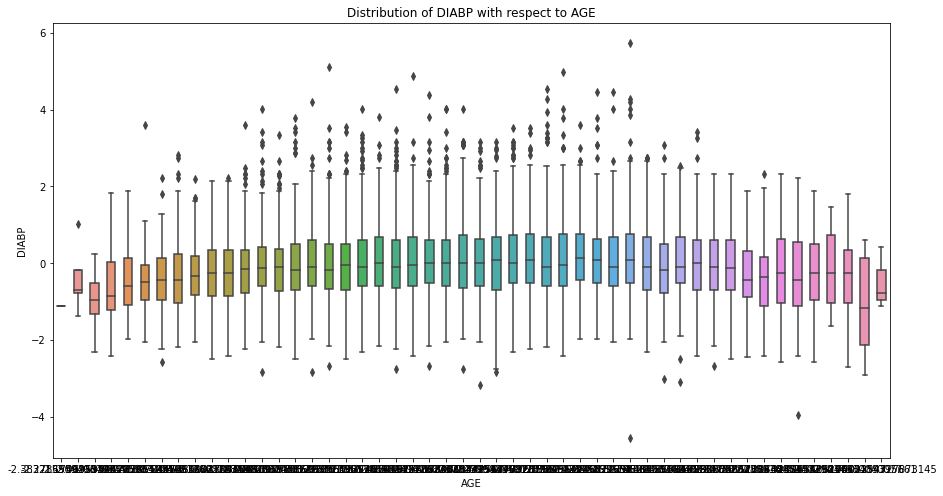

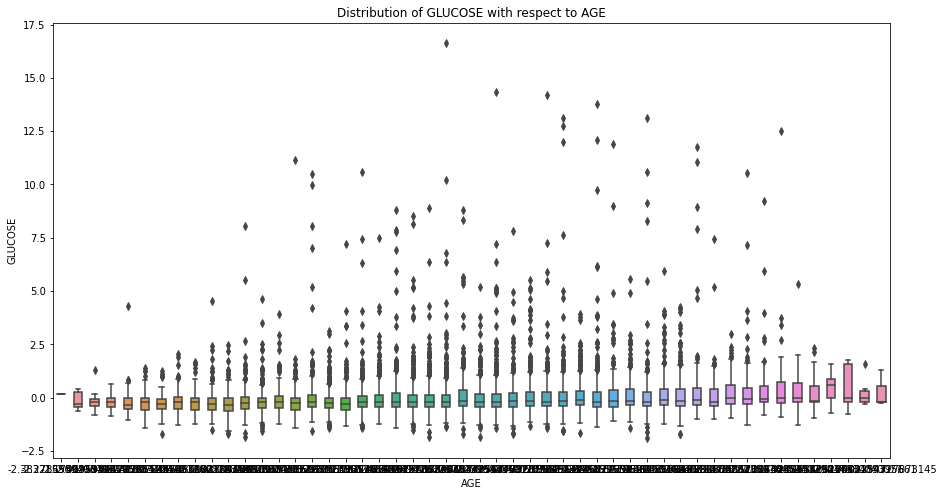

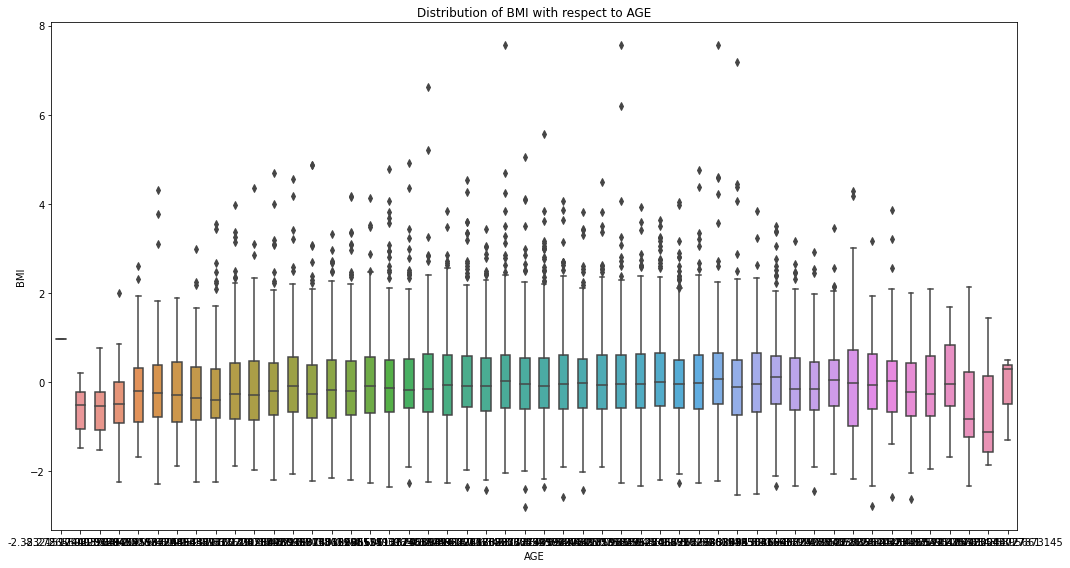

In [87]:
plt.figure(figsize=(15, 8))

# Create a box plot for 'SYSBP' with respect to 'AGE'
sns.boxplot(x='AGE', y='SYSBP', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('SYSBP')
plt.title('Distribution of SYSBP with respect to AGE')

plt.figure(figsize=(15, 8))

# Create a box plot for 'DIABP' with respect to 'AGE'
sns.boxplot(x='AGE', y='DIABP', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('DIABP')
plt.title('Distribution of DIABP with respect to AGE')

plt.figure(figsize=(15, 8))

# Create a box plot for 'GLUCOSE' with respect to 'AGE'
sns.boxplot(x='AGE', y='GLUCOSE', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('GLUCOSE')
plt.title('Distribution of GLUCOSE with respect to AGE')

plt.figure(figsize=(15, 8))

# Create a box plot for 'BMI' with respect to 'AGE'
sns.boxplot(x='AGE', y='BMI', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.title('Distribution of BMI with respect to AGE')

plt.tight_layout()
plt.show()


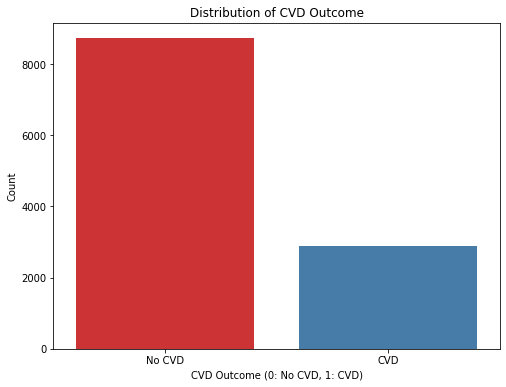

In [88]:
target_variable = 'CVD'

# Count plot to visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=target_variable, palette='Set1')
plt.xlabel('CVD Outcome (0: No CVD, 1: CVD)')
plt.ylabel('Count')
plt.title('Distribution of CVD Outcome')
plt.xticks(ticks=[0, 1], labels=['No CVD', 'CVD'])
plt.show()

In [89]:
x = db.drop(columns=['DEATH'])
y = db['DEATH']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(solver='newton-cg',
    penalty='l2',        # Regularization penalty (l2)
    C=1.0,               # Inverse of regularization strength
    max_iter=100)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the testing data
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity'],
    'Value': [accuracy, precision, recall, specificity]
})

# Print the table of results
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


                 Metric     Value
0              Accuracy  0.967326
1             Precision  0.995434
2  Recall (Sensitivity)  0.899587
3           Specificity  0.998124


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [90]:
x.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'ANGINA', 'HOSPMI',
       'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI',
       'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [91]:
x = db.drop(columns=['DEATH'])
y = db['DEATH']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the testing data
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity'],
    'Value': [accuracy, precision, recall, specificity]
})

# Print the table of results
print(results_df)


                 Metric     Value
0              Accuracy  0.999140
1             Precision  1.000000
2  Recall (Sensitivity)  0.997249
3           Specificity  1.000000


In [92]:
# Split the dataset into features (X) and the target variable (y)
X = db.drop(columns=['DEATH'])
y = db['DEATH']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) Classifier model
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity'],
    'Value': [accuracy, precision, recall, specificity]
})

# Print the table of results
print(results_df)


                 Metric  Value
0              Accuracy    1.0
1             Precision    1.0
2  Recall (Sensitivity)    1.0
3           Specificity    1.0


In [93]:
# Split the dataset into features (X) and the target variable (y)
X = db.drop(columns=['DEATH'])
y = db['DEATH']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors (KNN) Classifier model with a specified number of neighbors (e.g., 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity'],
    'Value': [accuracy, precision, recall, specificity]
})

# Print the table of results
print(results_df)

                 Metric     Value
0              Accuracy  0.969905
1             Precision  0.965957
2  Recall (Sensitivity)  0.936726
3           Specificity  0.984991
